In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv',usecols=['Survived','Pclass','Age','Fare'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [4]:
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
random_sample.index=df[df['Age'].isnull()].index
df.loc[df['Age'].isnull(),'Age']=random_sample

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [6]:
#using standard scalar from sklearn library

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()
# difference btw fit & fit_transform - fit_transform is used when transform is data is to be done
#fit_transform comes along with the pre processing library to change the data
df_scaled=scaler.fit_transform(df)

In [9]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.529034,-0.502445
1,1.266990,-1.566107,0.570208,0.786845
2,1.266990,0.827377,-0.254224,-0.488854
3,1.266990,-1.566107,0.364100,0.420730
4,-0.789272,0.827377,0.364100,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.185521,-0.386671
887,1.266990,-1.566107,-0.735142,-0.044381
888,-0.789272,0.827377,-1.009953,-0.176263
889,1.266990,-1.566107,-0.254224,-0.044381


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

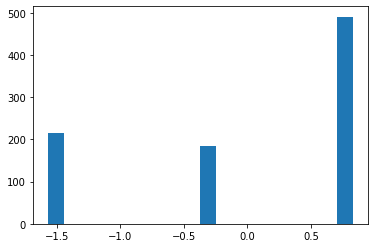

In [12]:
plt.hist(df_scaled[:,1],bins=20)
#histogram for pclass

(array([ 52.,  18.,  16.,  38.,  97., 124., 108., 101.,  97.,  56.,  42.,
         41.,  37.,  18.,  18.,  14.,   6.,   5.,   1.,   2.]),
 array([-2.01163752, -1.73826967, -1.46490182, -1.19153397, -0.91816613,
        -0.64479828, -0.37143043, -0.09806259,  0.17530526,  0.44867311,
         0.72204096,  0.9954088 ,  1.26877665,  1.5421445 ,  1.81551234,
         2.08888019,  2.36224804,  2.63561589,  2.90898373,  3.18235158,
         3.45571943]),
 <BarContainer object of 20 artists>)

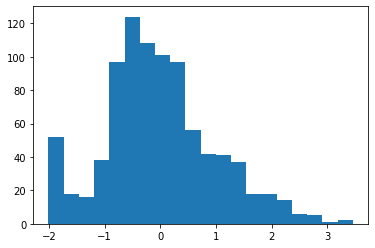

In [14]:
plt.hist(df_scaled[:,2],bins=20)
#for age

# Min Max scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df_minmax=pd.DataFrame(minmax.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

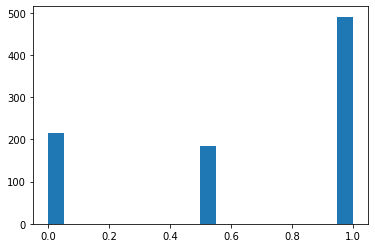

In [24]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 52.,  18.,  16.,  38.,  97., 124., 108., 101.,  97.,  56.,  42.,
         41.,  37.,  18.,  18.,  14.,   6.,   5.,   1.,   2.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

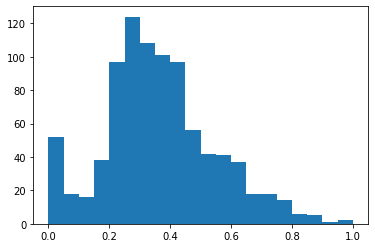

In [26]:
plt.hist(df_minmax['Age'],bins=20)

# Robust scalar

In [28]:
from sklearn.preprocessing import RobustScaler

In [30]:
robust=RobustScaler()
df_robust=pd.DataFrame(robust.fit_transform(df),columns=df.columns)
df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.352941,-0.312011
1,1.0,-2.0,0.588235,2.461242
2,1.0,0.0,-0.117647,-0.282777
3,1.0,-2.0,0.411765,1.673732
4,0.0,0.0,0.411765,-0.277363


(array([ 52.,  18.,  16.,  38.,  97., 124., 108., 101.,  97.,  56.,  42.,
         41.,  37.,  18.,  18.,  14.,   6.,   5.,   1.,   2.]),
 array([-1.62235294, -1.38829412, -1.15423529, -0.92017647, -0.68611765,
        -0.45205882, -0.218     ,  0.01605882,  0.25011765,  0.48417647,
         0.71823529,  0.95229412,  1.18635294,  1.42041176,  1.65447059,
         1.88852941,  2.12258824,  2.35664706,  2.59070588,  2.82476471,
         3.05882353]),
 <BarContainer object of 20 artists>)

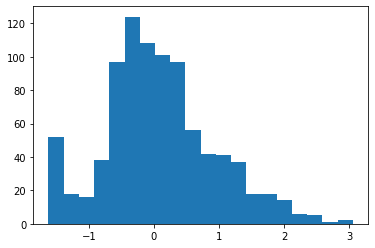

In [31]:
plt.hist(df_robust['Age'],bins=20)

# Guassian Distribution

In [33]:
df=pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [37]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [38]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [41]:
import scipy.stats as stat
import pylab

In [39]:
#to check whether the distribution is normal or not we use Q Q plot

In [42]:
def plot_data(df,feature):
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

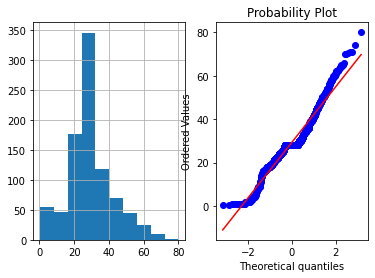

In [43]:
plot_data(df,'Age')

In [44]:
#if most of the points fall on the line then it is said to be guassian distribution
#since most of the points fall on line but still we are checking with other distributions also

Logarthmic distribution

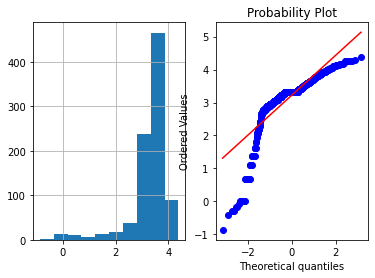

In [47]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

Reciprocal Transformation

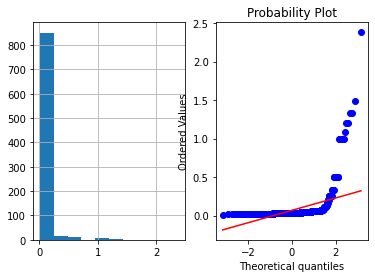

In [49]:
df['Age_reciprocal']=1/df['Age']
plot_data(df,'Age_reciprocal')

Square root Transformation

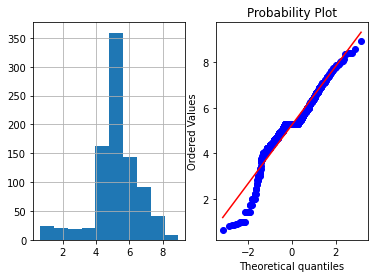

In [50]:
df['Age_square']=df['Age']**(1/2)
plot_data(df,'Age_square')

Exponential transformation

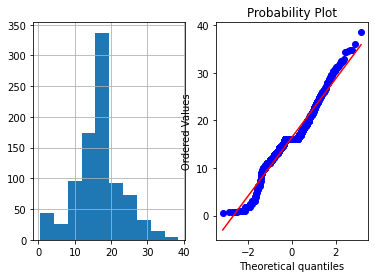

In [52]:
df['Age_exponential']=df['Age']**(1/1.2)
#mathematically value
plot_data(df,'Age_exponential')

BoxCox Transformation

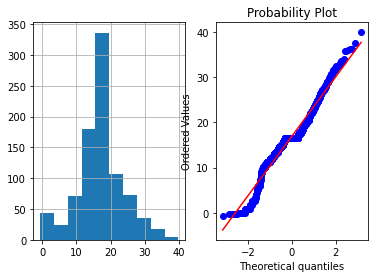

In [54]:
df['Age_boxcox'],parameter=stat.boxcox(df['Age'])
plot_data(df,'Age_boxcox')

In [55]:
#after trying all sort of transform boxcox was very close to the accuracy 